## Librerías

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn import svm 
from sklearn.utils import shuffle
try:
    from mlxtend.plotting import plot_decision_regions
except:
    !pip install mlxtend

## **Diagnóstico de cáncer de mama**

El objetivo es clasificar un tumor en Maligno (M) o Benigno (B) a partir de un conjunto de
datos que contiene características extraídas de la imagen digitalizada de una biopsia de
bulto en mama. Se dispone de 569 muestras, 357 de ellas benignas y 212 malignas. Cada
muestra posee una identificación (ID number), el diagnóstico (diagnosis) y 30 atributos
relacionados a 10 características:
1. radius: media de las distancias desde el centro hacia puntos del perímetro.
2. texture: desviación estándar de las intensidades en escala de grises.
3. perimeter.
4. area.
5. smoothness: variación local de largo de los radios.
6. compactness: perimeter2 / area - 1.0
7. concavity: severidad de secciones cóncavas en la delineación.
8. concave points: número de secciones cóncavas en la delineación.
9. symmetry.
10. fractal dimension: "coastline approximation" - 1

# Leer archivo

In [62]:
df_cancer = pd.read_csv("data_breast_cancer.csv")

In [63]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
df_cancer.shape

(569, 33)

# Limpieza

Archivo contiene 569 filas y 33 columnas.

Resumen de la BD:




In [65]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Lo primero que se logra ver es que existe una columna vacia al final del archivo por lo tanto se eliminará y además se elimina columna "id" que no aporta en nada.
Tambien podemos ver que no tenemos valores nulos en nuetra BD

In [66]:
df_cancer = df_cancer.drop(columns = ["Unnamed: 32", "id"])

In [67]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Exploración

### Estadísticas descriptivas

In [68]:
df_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Cantidad de casos Malignos y Benignos

In [69]:
count_diagnosis = df_cancer['diagnosis'].value_counts()
print(count_diagnosis)
list_diagnosis = ["Benigno", "Maligno"]
print(list_diagnosis)

B    357
M    212
Name: diagnosis, dtype: int64
['Benigno', 'Maligno']


<function matplotlib.pyplot.show>

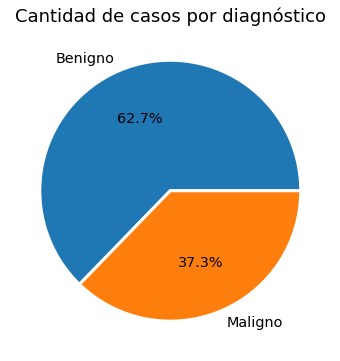

In [70]:
plt.subplots(figsize=(6, 6))
plt.pie(count_diagnosis, labels= list_diagnosis, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large'})
plt.title("Cantidad de casos por diagnóstico", fontsize = 18)
plt.show

### Pasamos la variable dependiente de objeto a numérica

In [71]:
##df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M':1,'B':0})

## Distribución Histogramas

Revisando la distribución de los 10 primeros atributos (Media).

Para definir los bins se aplicó la regla de sturges (número de clases que deben considerar al elaborarse un histograma)
Este número viene dado por la siguiente expresión:
c=1+log2(M) Donde M es el tamaño de la muestra

In [72]:
k=int(np.ceil(1+np.log2(569)))
print(k)

11


<function matplotlib.pyplot.show>

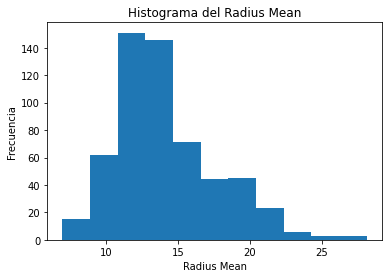

In [73]:
plt.hist(df_cancer['radius_mean'], bins = k)
plt.xlabel("Radius Mean")
plt.ylabel("Frecuencia")
plt.title("Histograma del Radius Mean")
plt.show

In [74]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<function matplotlib.pyplot.show>

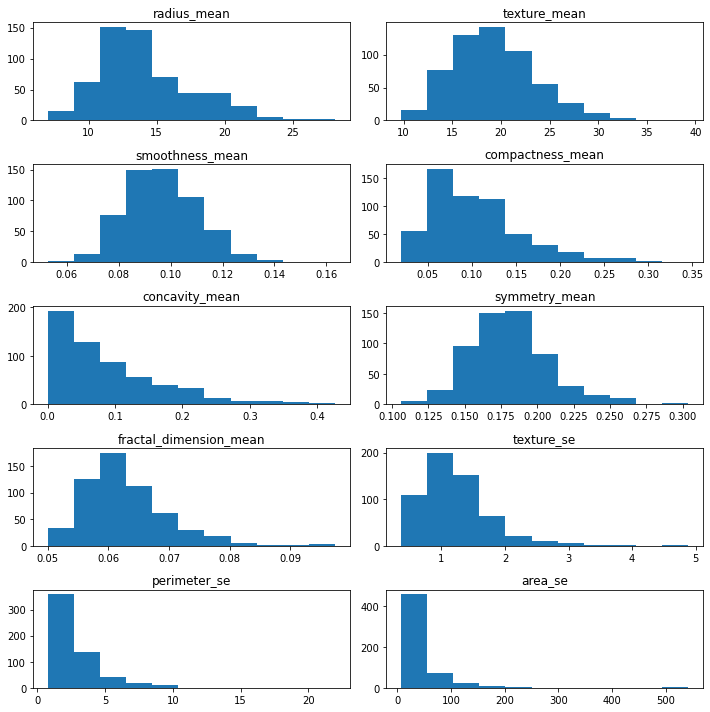

In [75]:
figure, axs = plt.subplots(5,2, figsize=(10, 10))
axs[0,0].hist(df_cancer['radius_mean'], bins=k)
axs[0,0].set_title("radius_mean")
axs[0,1].hist(df_cancer['texture_mean'], bins=k)
axs[0,1].set_title("texture_mean")
axs[1,0].hist(df_cancer['smoothness_mean'], bins=k)
axs[1,0].set_title("smoothness_mean")
axs[1,1].hist(df_cancer['compactness_mean'], bins=k)
axs[1,1].set_title("compactness_mean")
axs[2,0].hist(df_cancer['concavity_mean'], bins=k)
axs[2,0].set_title("concavity_mean")
axs[2,1].hist(df_cancer['symmetry_mean'], bins=k)
axs[2,1].set_title("symmetry_mean")
axs[3,0].hist(df_cancer['fractal_dimension_mean'], bins=k)
axs[3,0].set_title("fractal_dimension_mean")
axs[3,1].hist(df_cancer['texture_se'], bins=k)
axs[3,1].set_title("texture_se")
axs[4,0].hist(df_cancer['perimeter_se'], bins=k)
axs[4,0].set_title("perimeter_se")
axs[4,1].hist(df_cancer['area_se'], bins=k)
axs[4,1].set_title("area_se")
figure.tight_layout()
plt.show

<function matplotlib.pyplot.show>

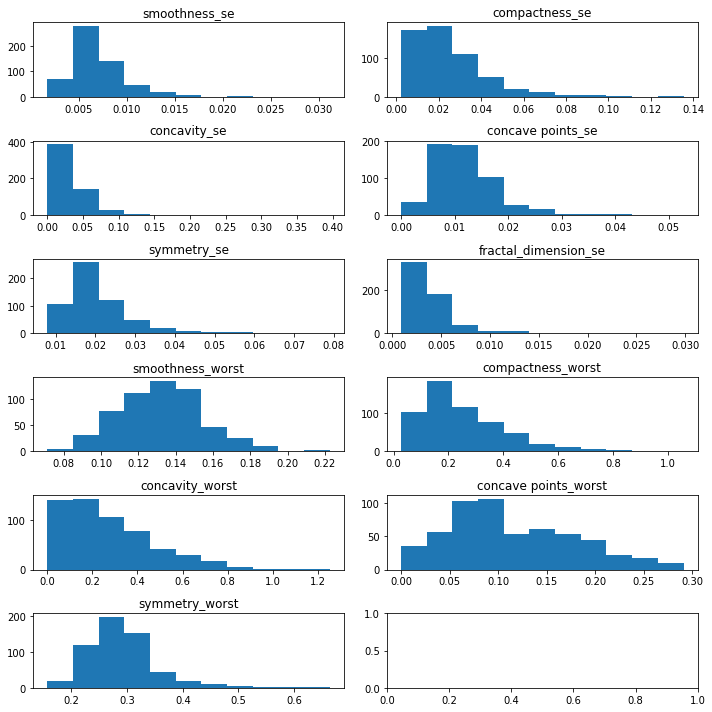

In [76]:
figure, axs = plt.subplots(6,2, figsize=(10, 10))
axs[0,0].hist(df_cancer['smoothness_se'], bins=k)
axs[0,0].set_title("smoothness_se")
axs[0,1].hist(df_cancer['compactness_se'], bins=k)
axs[0,1].set_title("compactness_se")
axs[1,0].hist(df_cancer['concavity_se'], bins=k)
axs[1,0].set_title("concavity_se")
axs[1,1].hist(df_cancer['concave points_se'], bins=k)
axs[1,1].set_title("concave points_se")
axs[2,0].hist(df_cancer['symmetry_se'], bins=k)
axs[2,0].set_title("symmetry_se")
axs[2,1].hist(df_cancer['fractal_dimension_se'], bins=k)
axs[2,1].set_title("fractal_dimension_se")
axs[3,0].hist(df_cancer['smoothness_worst'], bins=k)
axs[3,0].set_title("smoothness_worst")
axs[3,1].hist(df_cancer['compactness_worst'], bins=k)
axs[3,1].set_title("compactness_worst")
axs[4,0].hist(df_cancer['concavity_worst'], bins=k)
axs[4,0].set_title("concavity_worst")
axs[4,1].hist(df_cancer['concave points_worst'], bins=k)
axs[4,1].set_title("concave points_worst")
axs[5,0].hist(df_cancer['symmetry_worst'], bins=k)
axs[5,0].set_title("symmetry_worst")
figure.tight_layout()
plt.show

<function matplotlib.pyplot.show>

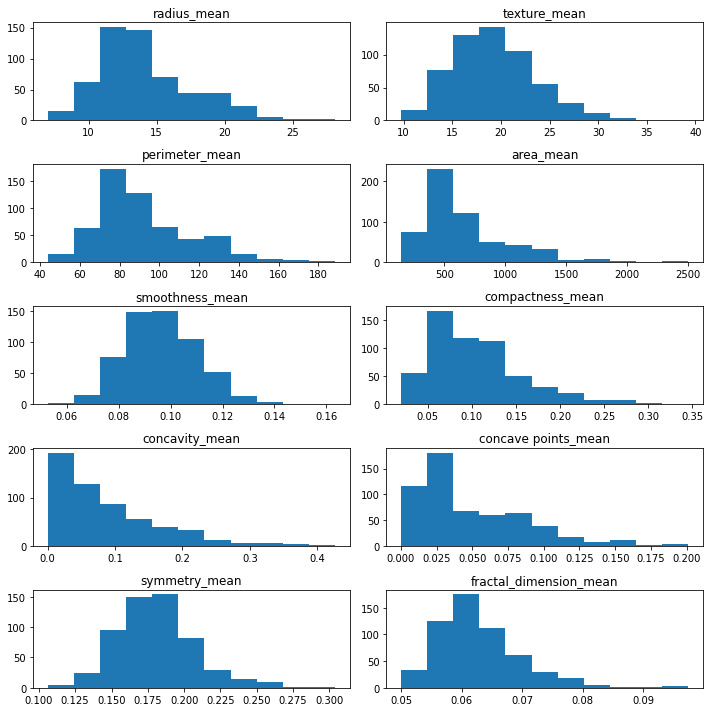

In [77]:
figure, axs = plt.subplots(5,2, figsize=(10, 10))
axs[0,0].hist(df_cancer['radius_mean'], bins=k)
axs[0,0].set_title("radius_mean")
axs[0,1].hist(df_cancer['texture_mean'], bins=k)
axs[0,1].set_title("texture_mean")
axs[1,0].hist(df_cancer['perimeter_mean'], bins=k)
axs[1,0].set_title("perimeter_mean")
axs[1,1].hist(df_cancer['area_mean'], bins=k)
axs[1,1].set_title("area_mean")
axs[2,0].hist(df_cancer['smoothness_mean'], bins=k)
axs[2,0].set_title("smoothness_mean")
axs[2,1].hist(df_cancer['compactness_mean'], bins=k)
axs[2,1].set_title("compactness_mean")
axs[3,0].hist(df_cancer['concavity_mean'], bins=k)
axs[3,0].set_title("concavity_mean")
axs[3,1].hist(df_cancer['concave points_mean'], bins=k)
axs[3,1].set_title("concave points_mean")
axs[4,0].hist(df_cancer['symmetry_mean'], bins=k)
axs[4,0].set_title("symmetry_mean")
axs[4,1].hist(df_cancer['fractal_dimension_mean'], bins=k)
axs[4,1].set_title("fractal_dimension_mean")
figure.tight_layout()
plt.show

## Relación de variables

Relación entre los distintas variables por diagnóstico

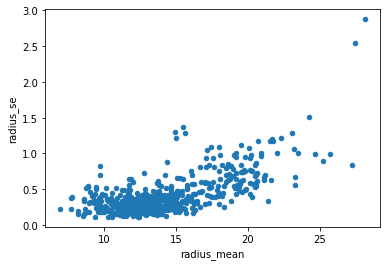

In [78]:
#df_cancer.plot(kind="scatter", x="radius_mean", y="texture_mean")
df_cancer.plot(kind="scatter", x="radius_mean", y="radius_se")


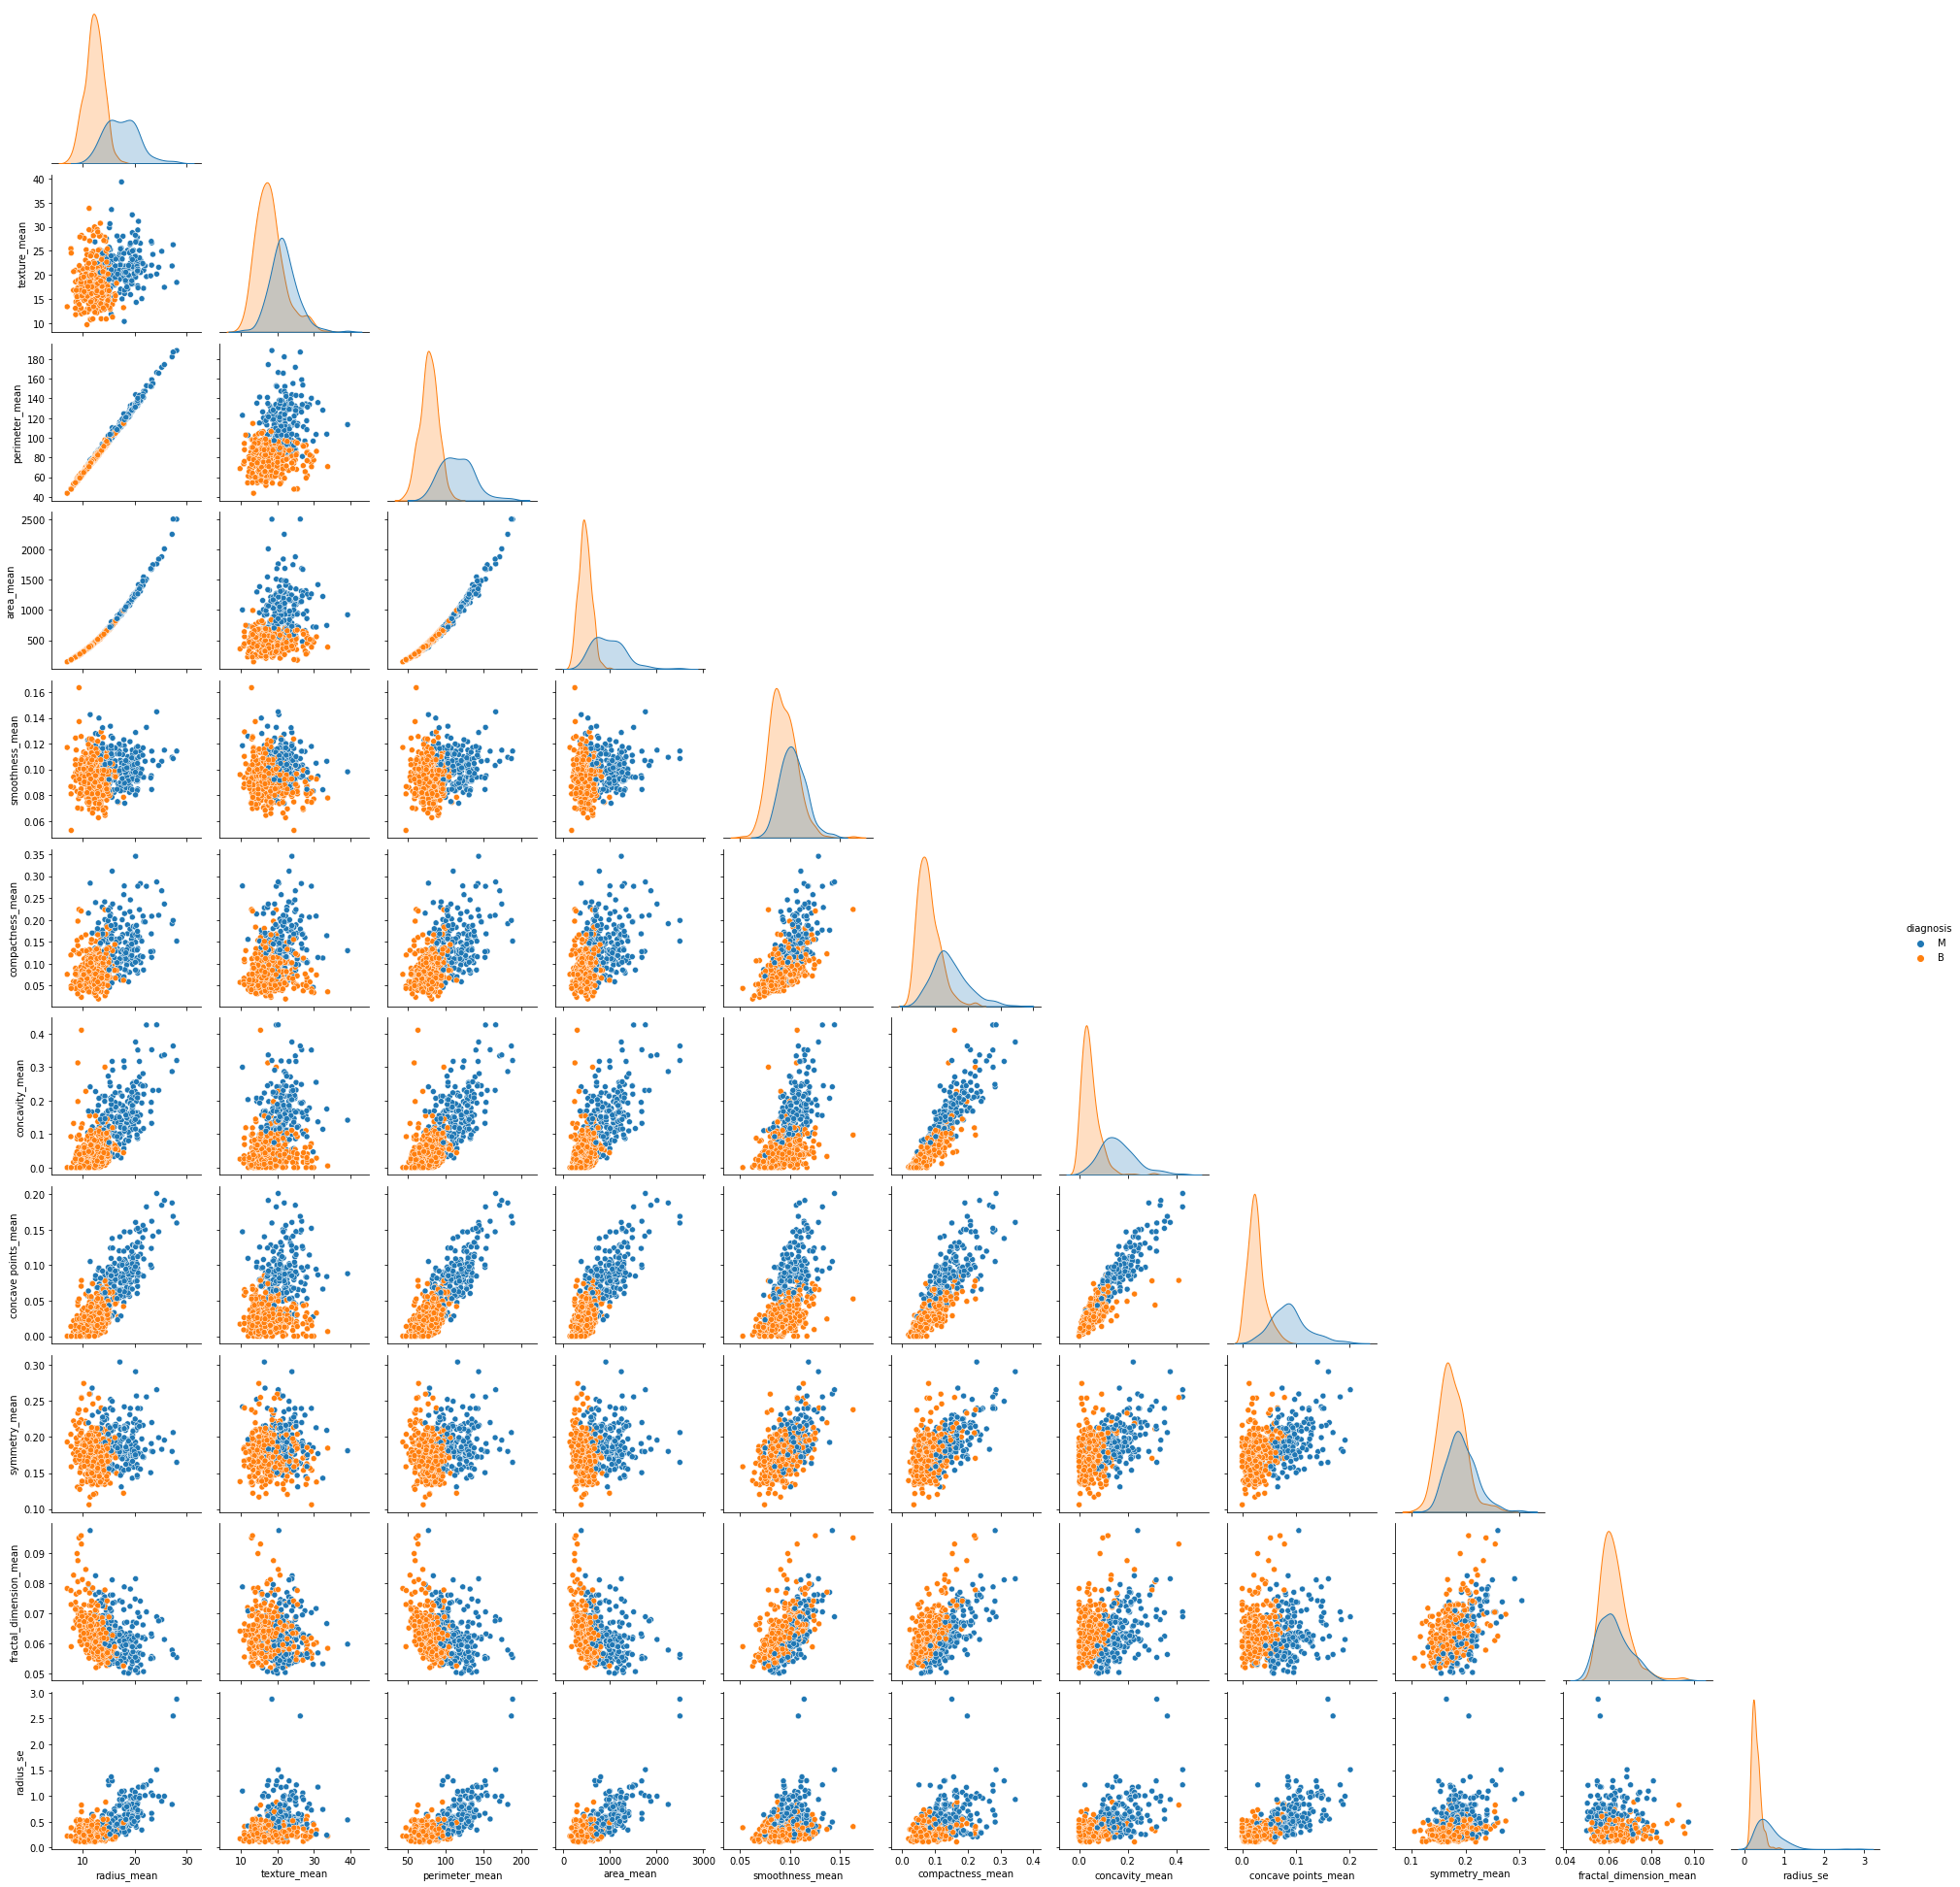

In [79]:
sns.pairplot(df_cancer.iloc[:,0:12], hue = 'diagnosis', corner=True)

## Boxplot

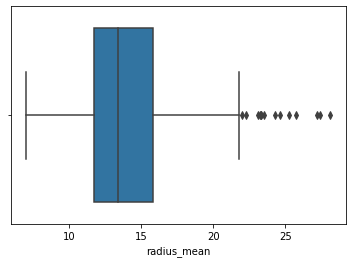

In [80]:
#plt.boxplot(df_cancer["radius_mean"])
#plt.ylabel("Boxplot del radius mean")
#plt.title("Boxplot del radius mean")
sns.boxplot(x=df_cancer["radius_mean"])

## Comparación

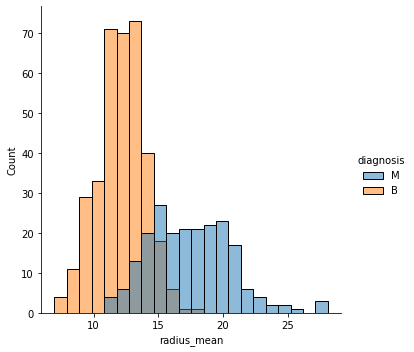

In [81]:
sns.displot(df_cancer, x="radius_mean", hue="diagnosis")

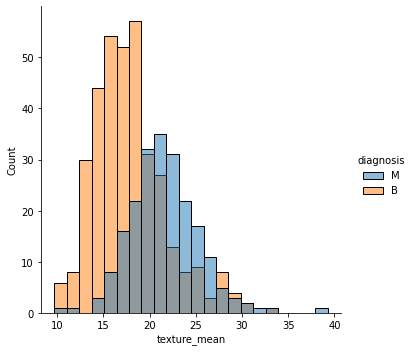

In [82]:
sns.displot(df_cancer, x="texture_mean", hue="diagnosis")

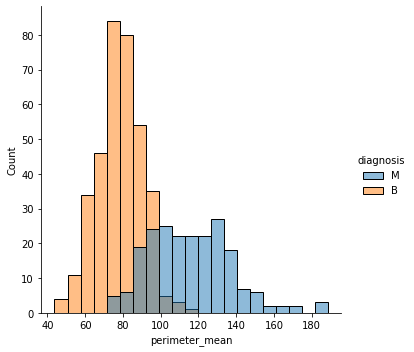

In [83]:
sns.displot(df_cancer, x="perimeter_mean", hue="diagnosis")

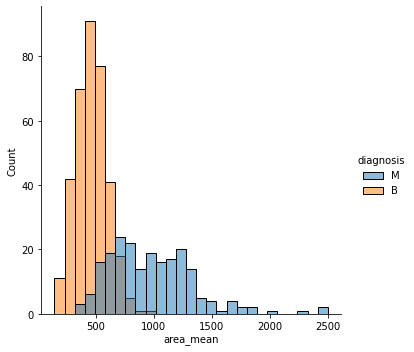

In [84]:
sns.displot(df_cancer, x="area_mean", hue="diagnosis")

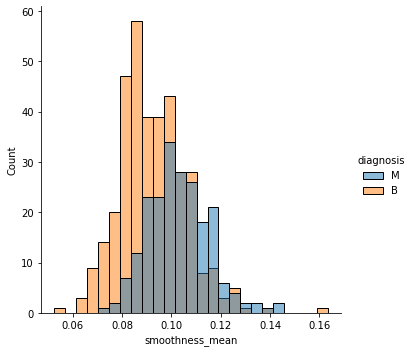

In [85]:
sns.displot(df_cancer, x="smoothness_mean", hue="diagnosis")

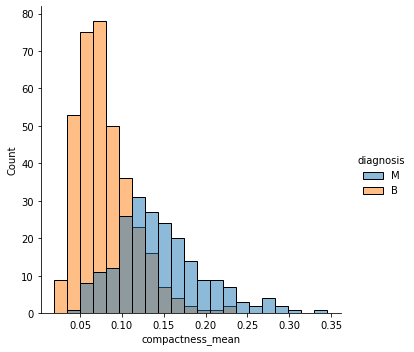

In [86]:
sns.displot(df_cancer, x="compactness_mean", hue="diagnosis")

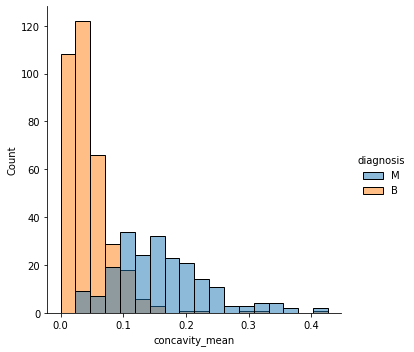

In [87]:
sns.displot(df_cancer, x="concavity_mean", hue="diagnosis")

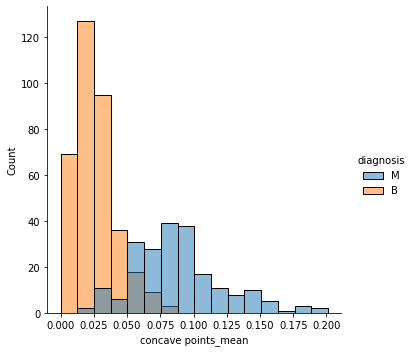

In [88]:
sns.displot(df_cancer, x="concave points_mean", hue="diagnosis")

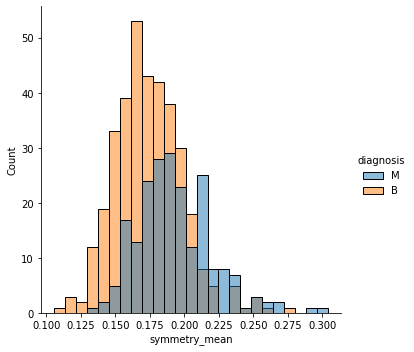

In [89]:
sns.displot(df_cancer, x="symmetry_mean", hue="diagnosis")

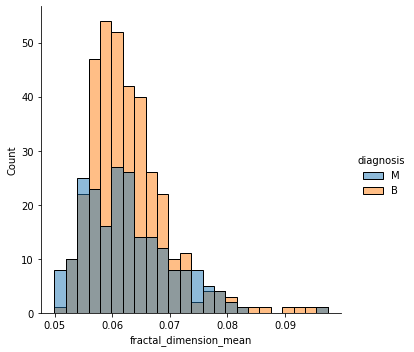

In [90]:
sns.displot(df_cancer, x="fractal_dimension_mean", hue="diagnosis")

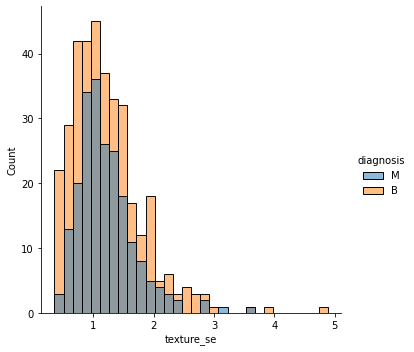

In [91]:
sns.displot(df_cancer, x="texture_se", hue="diagnosis")

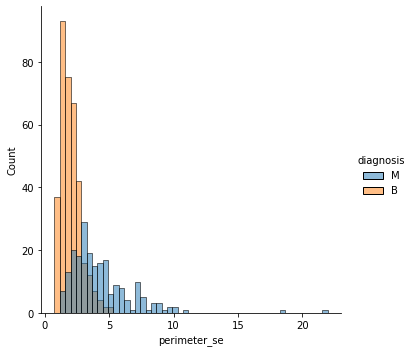

In [92]:
sns.displot(df_cancer, x="perimeter_se", hue="diagnosis")

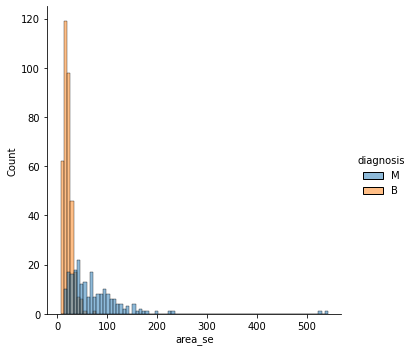

In [93]:
sns.displot(df_cancer, x="area_se", hue="diagnosis")

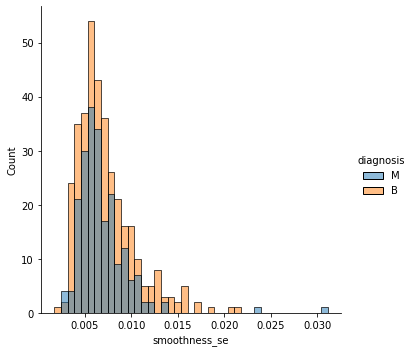

In [94]:
sns.displot(df_cancer, x="smoothness_se", hue="diagnosis")

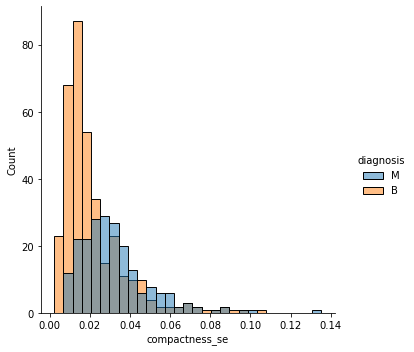

In [95]:
sns.displot(df_cancer, x="compactness_se", hue="diagnosis")

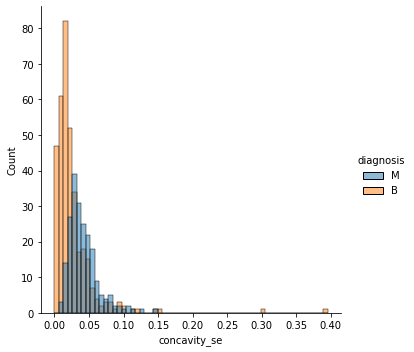

In [96]:
sns.displot(df_cancer, x="concavity_se", hue="diagnosis")

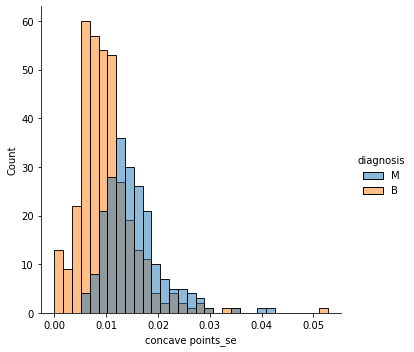

In [97]:
sns.displot(df_cancer, x="concave points_se", hue="diagnosis")

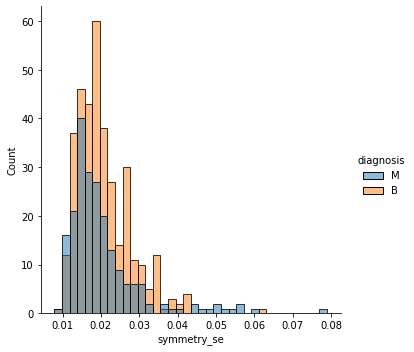

In [98]:
sns.displot(df_cancer, x="symmetry_se", hue="diagnosis")

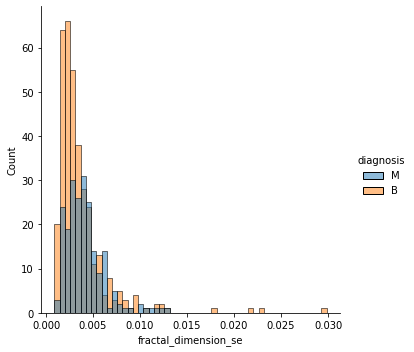

In [99]:
sns.displot(df_cancer, x="fractal_dimension_se", hue="diagnosis")

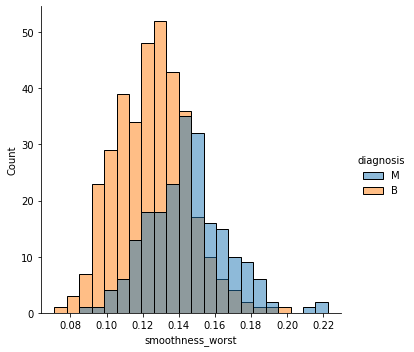

In [100]:
sns.displot(df_cancer, x="smoothness_worst", hue="diagnosis")

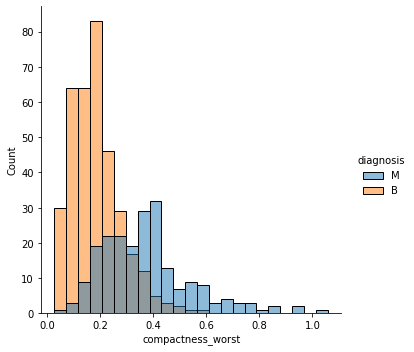

In [101]:
sns.displot(df_cancer, x="compactness_worst", hue="diagnosis")

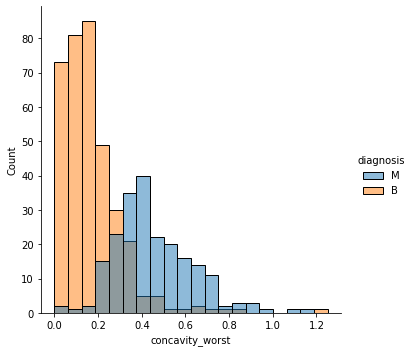

In [102]:
sns.displot(df_cancer, x="concavity_worst", hue="diagnosis")

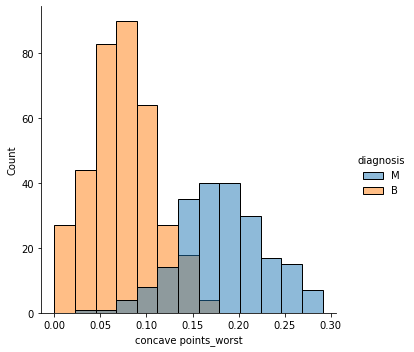

In [103]:
sns.displot(df_cancer, x="concave points_worst", hue="diagnosis")

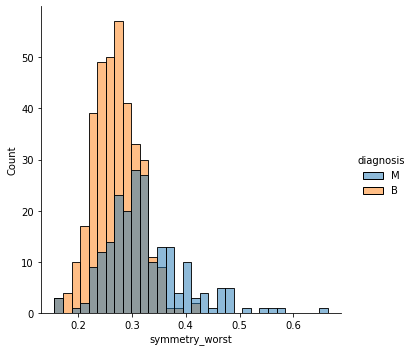

In [104]:
sns.displot(df_cancer, x="symmetry_worst", hue="diagnosis")

## Correlaciones

In [105]:
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M':1,'B':0})

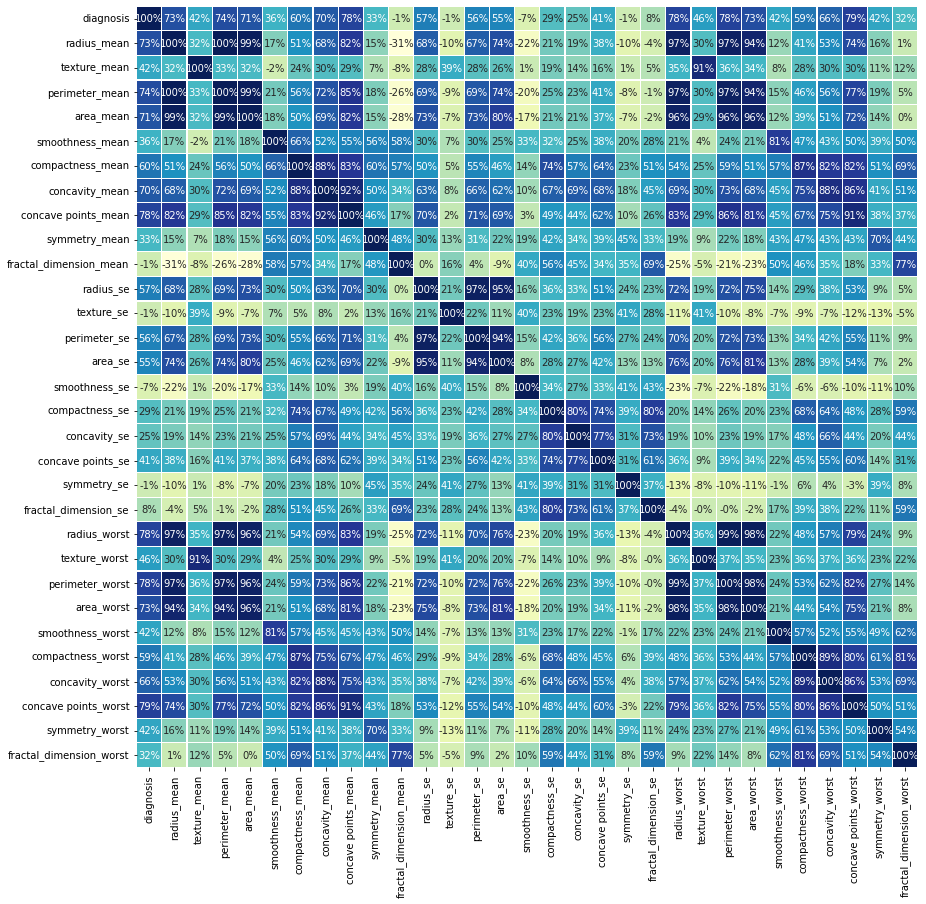

In [106]:
plt.figure(figsize=(14,14))
sns.heatmap(df_cancer.iloc[:,0:31].corr(), annot = True, fmt='.0%', linewidths=.1, cmap="YlGnBu", cbar=False)

# Preparación de datos

In [177]:
df_cancer2 = df_cancer

Eliminamos variables muy correlacionadas en un DF nuevo para pruebas

1-Eliminamos las dimensiones muy correlacionadas con radius_mes

In [178]:
#df_cancer2 = df_cancer.drop(columns = ["perimeter_mean", "area_mean", "radius_worst","perimeter_worst"])
df_cancer2 = df_cancer2.drop(columns = ["perimeter_mean", "area_mean", "radius_worst","perimeter_worst", "area_worst"])

2-Eliminamos las muy correlacionadas con texture_mean

In [179]:
df_cancer2 = df_cancer2.drop(columns = ["texture_worst"])

3-Eliminamos muy correlacionadas con perimeter_se

In [180]:
df_cancer2 = df_cancer2.drop(columns = ["perimeter_se", "area_se"])

4-Eliminamos muy correlacionadas con concave point_mean

In [181]:
df_cancer2 = df_cancer2.drop(columns = ["concave points_mean"])

Eliminamos las variables que no muestran preferencia particular a algun diagnostico

In [191]:
df_cancer2 = df_cancer2.drop(columns = ["texture_mean","smoothness_mean", "symmetry_mean", "fractal_dimension_mean", "texture_se", "smoothness_se", "compactness_se","concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "smoothness_worst", "symmetry_worst"])

In [242]:
df_cancer2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   compactness_mean         569 non-null    float64
 3   concavity_mean           569 non-null    float64
 4   radius_se                569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concavity_worst          569 non-null    float64
 7   concave points_worst     569 non-null    float64
 8   fractal_dimension_worst  569 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 40.1 KB


In [219]:
df_cancer2.head()

,diagnosis,radius_mean,compactness_mean,concavity_mean,radius_se,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
0,1,17.99,0.27760,0.3001,1.0950,0.6656,0.7119,0.2654,0.11890
1,1,20.57,0.07864,0.0869,0.5435,0.1866,0.2416,0.1860,0.08902
2,1,19.69,0.15990,0.1974,0.7456,0.4245,0.4504,0.2430,0.08758
3,1,11.42,0.28390,0.2414,0.4956,0.8663,0.6869,0.2575,0.17300
4,1,20.29,0.13280,0.1980,0.7572,0.2050,0.4000,0.1625,0.07678


Separamos variable dependiente (Y) y resto de variables (X)

In [229]:
X = df_cancer2.iloc[:,1:9].values
Y = df_cancer2.iloc[:,0].values

print('Shape datos de entrada: ', X.shape)
print('Shape etiquetas: ', Y.shape)

Shape datos de entrada:  (569, 8)
Shape etiquetas:  (569,)


Separamos la data en 70% entranamiento y 30% test

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
# x, y: Datos y etiquetas
# test_size: Proporción del dataset que será del conjunto de test
# random_state: Controla el shuffle de los datos antes de hacer el split

In [244]:
print('Train: x {} y {}'.format(X_train.shape, y_train.shape))
print('Test: x {} y {}'.format(X_test.shape, y_test.shape))

Train: x (426, 8) y (426,)
Test: x (143, 8) y (143,)


Vamos escalar la data para que este entre 0 y 1

In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Predicción y Entrenamiento

## Entrenar modelos

In [282]:
def modelos(X_train, y_train):
  
  from sklearn.model_selection import cross_val_score

  #Regresion Logistica
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)
  scores_log = cross_val_score(log, X_train, y=y_train, cv=5)

  ##Arboles de decision
  from sklearn.tree import DecisionTreeClassifier
  arbol = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  arbol.fit(X_train, y_train)
  scores_arbol = cross_val_score(arbol, X_train, y=y_train, cv=5)

  ##Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, min_samples_split=25, max_depth=7, max_features=2)
  forest.fit(X_train, y_train)
  scores_forest = cross_val_score(forest, X_train, y=y_train, cv=5)

  ##SVM
  from sklearn.svm import SVC
  SVM = SVC(kernel='linear', C=1, random_state=0)
  SVM.fit(X_train, y_train)
  scores_SVM = cross_val_score(SVM, X_train, y=y_train, cv=5)

  ##imprimimos los valores de acurracy para cada modelo
  print('[0] Regresion Logistica acurracy entranamiento:', log.score(X_train, y_train))
  print('[1] Arbol de decision acurracy entranamiento:', arbol.score(X_train, y_train))
  print('[2] Random Forest acurracy entranamiento:', forest.score(X_train, y_train))
  print('[3] SVM acurracy entranamiento:', SVM.score(X_train, y_train))
  print()
  print("VALIDACION CRUZADA PARA CADA MODELO")
  print('scores_log: ', scores_log)
  print("Accuracy scores_log: {} +- {}".format(scores_log.mean(), scores_log.std()))
  print()
  print('scores_arbol: ', scores_arbol)
  print("Accuracy scores_arbol: {} +- {}".format(scores_arbol.mean(), scores_arbol.std()))
  print()
  print('scores_forest: ', scores_forest)
  print("Accuracy scores_forest: {} +- {}".format(scores_forest.mean(), scores_forest.std()))
  print()
  print('scores_SVM: ', scores_SVM)
  print("Accuracy scores_SVM: {} +- {}".format(scores_SVM.mean(), scores_SVM.std()))
  print()

  return log, arbol, forest, SVM

Retornamos el accuracy de todos los modelos

In [283]:
model = modelos(X_train, y_train)

[0] Regresion Logistica acurracy entranamiento: 0.9413145539906104
[1] Arbol de decision acurracy entranamiento: 1.0
[2] Random Forest acurracy entranamiento: 0.9624413145539906
[3] SVM acurracy entranamiento: 0.9366197183098591

VALIDACION CRUZADA PARA CADA MODELO
scores_log:  [0.90697674 0.94117647 0.91764706 0.94117647 0.95294118]
Accuracy scores_log: 0.9319835841313269 +- 0.016965358831618475

scores_arbol:  [0.91860465 0.95294118 0.90588235 0.90588235 0.87058824]
Accuracy scores_arbol: 0.91077975376197 +- 0.02646560715532099

scores_forest:  [0.88372093 0.96470588 0.94117647 0.94117647 0.91764706]
Accuracy scores_forest: 0.9296853625171 +- 0.027379473077604823

scores_SVM:  [0.91860465 0.92941176 0.92941176 0.94117647 0.92941176]
Accuracy scores_SVM: 0.9296032831737348 +- 0.0071416890301090954



## Predicción y Evaluacion de modelos

In [226]:
##Test modelo acurracy con data test en matriz de confusión

Matriz de confusión

In [284]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("modelo: ",i)
  cm = confusion_matrix(y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FP = cm[1][0]
  FN = cm[0][1]

  print(cm)
  print("testing acurracy: ", (TP+TN)/(TP+TN+FP+FN))
  print("testing recall: ", (TP)/(TP+FN))
  print("testing presicion: ", (TP)/(TP+FP))
  print()

modelo:  0
[[84  6]
 [ 3 50]]
testing acurracy:  0.9370629370629371
testing recall:  0.9333333333333333
testing presicion:  0.9655172413793104

modelo:  1
[[83  7]
 [ 7 46]]
testing acurracy:  0.9020979020979021
testing recall:  0.9222222222222223
testing presicion:  0.9222222222222223

modelo:  2
[[86  4]
 [ 6 47]]
testing acurracy:  0.9300699300699301
testing recall:  0.9555555555555556
testing presicion:  0.9347826086956522

modelo:  3
[[84  6]
 [ 3 50]]
testing acurracy:  0.9370629370629371
testing recall:  0.9333333333333333
testing presicion:  0.9655172413793104



Otra manera de obtener metricas de los modelos mediante classification_report

In [285]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print("modelo: ",i)
  # Reporte de clasificación
  print(classification_report(y_test, model[i].predict(X_test)))
  print(accuracy_score(y_test, model[i].predict(X_test)))
  print()

modelo:  0
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        90
           1       0.89      0.94      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

modelo:  1
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        90
           1       0.87      0.87      0.87        53

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143

0.9020979020979021

modelo:  2
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        90
           1       0.92      0.89      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
w

## Plot de la matriz de confusion

In [286]:
def plot_cm(cm, classes):
    plt.figure(figsize = (5,5))
    akws = {"ha": 'left',"va": 'center', 'size':20}

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax , annot_kws=akws, fmt='g')

    # labels, title and ticks
    #ax.set_xlabel('\nPredicted labels')
    #ax.set_ylabel('True labels') 
    ax.set_title('Matríz de confusión')   ## Descomentar para agregar título 
    
    #ax.xaxis.set_ticklabels(classes)
    #ax.yaxis.set_ticklabels(classes);

    plt.show()

modelo:  0


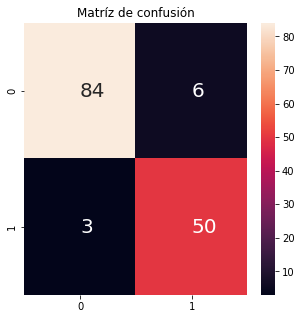


modelo:  1


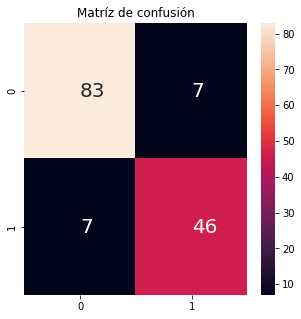


modelo:  2


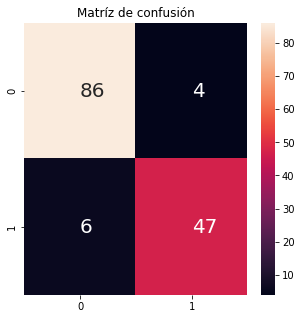


modelo:  3


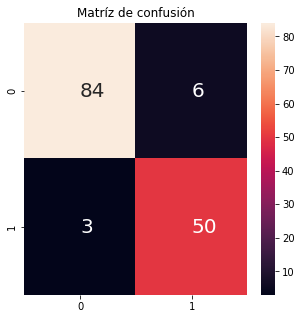

In [279]:
classes = ['0','1']
for i in range(len(model)):
  print("modelo: ",i)
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  plot_cm(cm, classes)
  print()